In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.12.0
1.23.5


In [2]:
from PIL import Image
import glob
import os

print('import done!')

import done!


In [3]:
# resize images to be 28x28

def resize_images(img_path):
    images = glob.glob(img_path + '/*.jpg')
    
    print(len(images), 'images to be resized')
    
    # resize to 28x28
    target_size = (28,28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.Resampling.LANCZOS)
        new_img.save(img, 'JPEG')
        
    print(len(images), 'images resized')
    
# 가위 전부 읽어들여서 리사이즈
image_dir_path = '/Users/leegen/Downloads/RSP/scissor'
resize_images(image_dir_path)

print('scissor resize done')

133 images to be resized
133 images resized
scissor resize done


In [4]:
# rock

image_dir_path = '/Users/leegen/Downloads/RSP/rock'
resize_images(image_dir_path)

107 images to be resized
107 images resized


In [5]:
# paper

image_dir_path = '/Users/leegen/Downloads/RSP/paper'
resize_images(image_dir_path)

118 images to be resized
118 images resized


# Load Data

In [6]:
import numpy as np

def load_data(img_path, number_of_data=358):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32
    ).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/Users/leegen/Downloads/RSP"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 358 입니다.
x_train shape: (358, 28, 28, 3)
y_train shape: (358,)


0


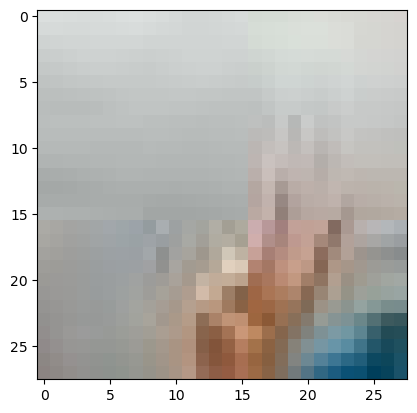

In [7]:
# load image

import matplotlib.pyplot as plt

plt.imshow(x_train[1])
print(y_train[1])

In [8]:
# GPT code for data augmentation
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# # Define an ImageDataGenerator for data augmentation
# datagen = ImageDataGenerator(
#     rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#     width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#     height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#     shear_range=0.1,  # randomly shear images
#     zoom_range=0.1,  # randomly zoom image
#     horizontal_flip=True,  # randomly flip images
#     fill_mode='nearest'  # fill in missing pixels after a transformation
# )

# # Compute quantities required for featurewise normalization
# datagen.fit(x_train)


In [9]:
y_train.shape

(358,)

In [10]:
x_train.shape

(358, 28, 28, 3)

In [12]:
# normalize x_train

x_train = x_train / 255
print(y_train[0:5])
x_train[0]

[0 0 0 0 0]


array([[[0.0033218 , 0.00350634, 0.00344483],
        [0.00330642, 0.00349097, 0.00342945],
        [0.00330642, 0.00347559, 0.00341407],
        ...,
        [0.00322953, 0.00330642, 0.00335256],
        [0.00318339, 0.00326028, 0.00330642],
        [0.00316801, 0.00322953, 0.00324491]],

       [[0.00319877, 0.00336794, 0.00330642],
        [0.00319877, 0.00336794, 0.00330642],
        [0.00321415, 0.00335256, 0.00330642],
        ...,
        [0.00321415, 0.00329104, 0.00333718],
        [0.00318339, 0.00324491, 0.00326028],
        [0.00315263, 0.00321415, 0.00322953]],

       [[0.00313725, 0.00327566, 0.00322953],
        [0.00318339, 0.00327566, 0.00324491],
        [0.00319877, 0.00329104, 0.00326028],
        ...,
        [0.00321415, 0.00329104, 0.00333718],
        [0.00316801, 0.00322953, 0.00324491],
        [0.00315263, 0.00321415, 0.00322953]],

       ...,

       [[0.00230681, 0.00224529, 0.00222991],
        [0.00242983, 0.00235294, 0.00230681],
        [0.00249135, 0

In [ ]:
# model creation

import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

# 아래의 하이퍼파라미터는 예시입니다. 높은 인식률을 얻기 위해 하이퍼파라미터를 수정해 보세요. 
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model = keras.Sequential([
            Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)),
            BatchNormalization(),
            MaxPooling2D(2,2),
            Conv2D(64, (3,3), activation='relu'),
            BatchNormalization(),
            Dropout(0.2),
            MaxPooling2D(2,2),
            Flatten(),
            Dense(32, activation='relu'),
            Dropout(0.2),
            Dense(3, activation='softmax')  # Assuming you have 3 classes
        ])

model.summary()

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


# model compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Fit the model
history = model.fit(x_train, y_train, epochs=n_train_epoch, validation_data=(x_val, y_val), verbose=1)


# Continue with the previous plotting code...


2024-03-06 16:31:58.673195: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-06 16:31:58.673278: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-06 16:31:58.673298: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-06 16:31:58.673431: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-06 16:31:58.673485: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                        

2024-03-06 16:31:59.813948: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


---- 중간에 커널이 계속 꺼져서 lms 에서 돌렸습니다 ----

# 회고
- 픽셀이 너무 깨지는 게 아닌가? 32*32 로 바꾸기
- 육안으로도 구분이 안돼..
- 리사이즈 한 채로 돌리면 깨져서 다시 압축 푸는것부터 다시 하기
- dropout 추가, batch normalization 추가
- 로컬에서 계속 커널이 꺼져서 중간에 lms 로 옮겨갔다
- 왜 꺼지는지는 아직 잘 모르겠음
- GPT 가 Data Augmentation 도 추천해줬는데 아직 못해봤음